Generate a bathymetry file (as well as delx and dely files) with no canyon and non uniform resolution. Minimum resolution is 200 m near where the canyon should be along shore and across shore.




This notebook is based on the functions *make_arbitrary_topo_smooth*, *tanktopo*, *canyontopo* and *widthprofile* which were originally written by S. Allen, and modified by T. Howatt and J. Spurgin (They have been translated form python to matlab and here to python again). 

They have to be loaded from the module BathyPythonTools.py

K. Ramos Musalem

In [1]:

from math import *

import matplotlib.pyplot as plt

import numpy as np

import os

from scipy.interpolate import interp1d

import  sys

%matplotlib inline


In [2]:
lib_path = os.path.abspath('../PythonModulesMITgcm') # Add absolute path to my python scripts
sys.path.append(lib_path)

import BathyPythonTools as bat

In [3]:
#Interpolating my alongshore(AS) spacing - x-direction
ASx_size = 361
x_vary=np.arange(0,ASx_size,1)


In [4]:
#What I am using for the linear part (200m spacing between 33,000 & 87000m)
#What I am using for the linear part (200m spacing between 33,000 & 87000m)
ASx_linear = (0,60,300,360) # %/x_size
ASy_linear = (0,33.0e+3,87.0e+3,120.0e+3)
AS_linear = np.interp(x_vary,ASx_linear,ASy_linear) #donde quiero, donde esta, y lo que es
delx_AS_linear = (AS_linear[1:] - AS_linear[0:-1])

print (np.shape(delx_AS_linear))
#print (delx_AS_linear)

#print (delx_AS_linear)



(360,)


(60,)
(60,)
(61,)


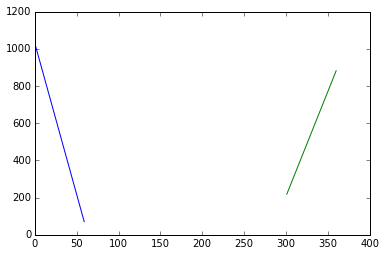

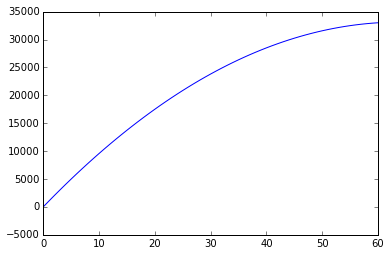

In [5]:
# x0-50 and x320-370
ASx_size1=60
ASx_size2=60

ASx_Boundaries1 = (0,20,60)
ASx_Boundaries2 = (300,340,360)

ASy_Boundaries1 = (0,17.5e+3,33.0e+3)
ASy_Boundaries2 = (87.0e+3,104.5e+3,120.0e+3)


F1 = interp1d(ASx_Boundaries1,ASy_Boundaries1,kind='quadratic') #bound_error=False allows values outside the domain to get NaN's
F2 = interp1d(ASx_Boundaries2,ASy_Boundaries2,kind='quadratic') #bound_error=False allows values outside the domain to get NaN's

AS_Boundaries1 = F1(x_vary[:61]) 
delx_AS_Boundaries1 = (AS_Boundaries1[1:] - AS_Boundaries1[0:-1]);

AS_Boundaries2 = F2(x_vary[300:]) 
delx_AS_Boundaries2 = (AS_Boundaries2[1:] - AS_Boundaries2[0:-1]);

print (np.shape(delx_AS_Boundaries1))
print (np.shape(delx_AS_Boundaries2))
print (np.shape(x_vary[300:]))

#print (delx_AS_Left)
plt.plot(x_vary[:60],delx_AS_Boundaries1)
plt.plot(x_vary[301:],delx_AS_Boundaries2)
plt.show()

plt.plot(AS_Boundaries1)



(360,)
(360,)
(361,)
[ 881.875  870.625  859.375  848.125  836.875  825.625  814.375  803.125
  791.875  780.625  769.375  758.125  746.875  735.625  724.375  713.125
  701.875  690.625  679.375  668.125  656.875  645.625  634.375  623.125
  611.875  600.625  589.375  578.125  566.875  555.625  544.375  533.125
  521.875  510.625  499.375  488.125  476.875  465.625  454.375  443.125
  431.875  420.625  409.375  398.125  386.875  375.625  364.375  353.125
  341.875  330.625  319.375  308.125  296.875  285.625  274.375  263.125
  251.875  240.625  229.375  218.125  225.     225.     225.     225.     225.
  225.     225.     225.     225.     225.     225.     225.     225.     225.
  225.     225.     225.     225.     225.     225.     225.     225.     225.
  225.     225.     225.     225.     225.     225.     225.     225.     225.
  225.     225.     225.     225.     225.     225.     225.     225.     225.
  225.     225.     225.     225.     225.     225.     225.     225.    

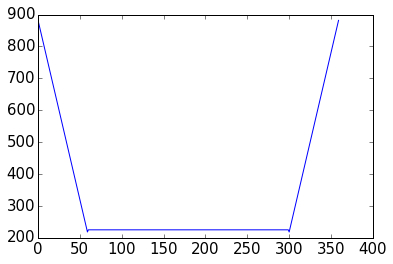

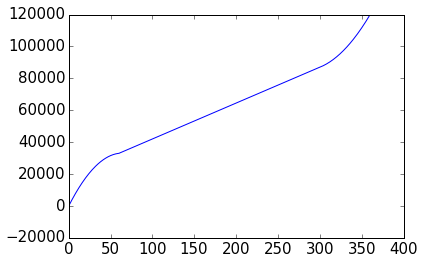

120000.0


In [23]:
x_edge = np.zeros(361)

x_edge[0:61] = AS_Boundaries1
x_edge[300:] = AS_Boundaries2
x_edge[60:300] = AS_linear[60:300]

x = ((x_edge[1:] + x_edge[0:-1])/2)
delx = (x_edge[1:] - x_edge[0:-1])

delx2 = delx
delx2[0:60]=delx[np.arange(359,299,-1)]

print (np.shape(delx2))
print (np.shape(x))
print (np.shape(x_edge))
print (delx)
#plt.plot(x)

plt.plot(delx2)
plt.show()
plt.plot(x_edge)
plt.show()
print(np.sum(delx2))

In [7]:
# The cross-shore (CS) variation - y-direction

CSy_size = 361
y_vary = np.arange(0,CSy_size,1)

In [8]:
#What I am using for the linear part

CSx_linear = (0,40,340,360)
CSy_linear = (0,20.0e+3,80.0e+3,90.0e+3)
CS_linear = np.interp(y_vary,CSx_linear,CSy_linear)
dely_CS_linear = (CS_linear[1:] - CS_linear[0:-1])

print (np.shape(dely_CS_linear))
#print (dely_CS_linear)


(360,)


(360,)


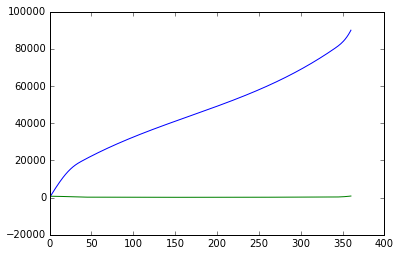

In [9]:
#What I am currently using for x0-40 and x340-360
CSx_Boundaries = (0,20,30,40,340,350,360)
CSy_Boundaries = (0,13.0e+3,17.25e+3,20.0e+3,80.0e+3,83.6e+3,90.0e+3)
cubfunc_y = interp1d(CSx_Boundaries,CSy_Boundaries,kind='cubic', bounds_error=False)
CS_Boundaries = cubfunc_y(y_vary)
dely_CS_Boundaries = (CS_Boundaries[1:] - CS_Boundaries[0:-1])

print (np.shape(dely_CS_Boundaries))


plt.plot(y_vary,CS_Boundaries)
plt.plot(y_vary[1:],dely_CS_Boundaries)



(360,)
(360,)
(361,)


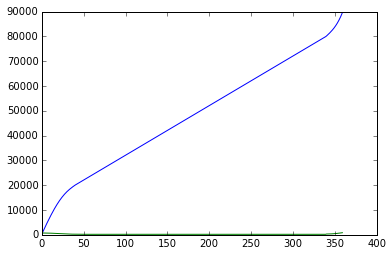

In [10]:

y_edge = np.zeros(361)

y_edge[0:40] = CS_Boundaries[0:40]
y_edge[340:] = CS_Boundaries[340:]
y_edge[40:340] = CS_linear[40:340]

y = ((y_edge[1:] + y_edge[0:-1])/2)
dely = (y_edge[1:] - y_edge[0:-1])

print (np.shape(dely))
print (np.shape(y))
print (np.shape(y_edge))


plt.plot(y)
plt.plot(dely)



In [11]:
total_fluid_depth = 1200.0

###Jessica's canyon###
#y_base = 25950.0  
#y_bc = 26360.0
#y_sb = 51220.0
#y_100 = 56130.0
#y_50 = 64220.0
#y_wall = 90000.0
#y_coast = 72400.0

#z_bottom = 100.0 
#z_sb = 1050.0 
#z_100 = 1100.0 
#z_wall = 1180.0
#z_bc = 200.0
#z_50 = 1150.0
#z_200 = 1000.0
#z_400 = 800.0
#z_600 = 600.0
#z_800 = 400.0

#x_wall = 120000.0
#cR = 5370.0        # radius of curvature on upstream side
#W = 7660.0     # canyon width at half-length
#Wsb = 13005.0   # canyon width at shelf-break 
#L = 16180.0       # canyon length

#set geometric parameters (see geometry.ods)
#p = 4.0                    # saved as geometry.csv        
#q = 6.0
# Constant buoyancy frequency
#N = 0.004

###############################################################################
### Barkley Canyon -like ###
y_base = 25950.0  
y_bc = 26360.0
y_sb = 51220.0
y_100 = 56130.0
y_50 = 64220.0
y_wall = 90000.0
y_coast = 72400.0

z_bottom = 100.0 
z_sb = 1050.0 
z_100 = 1100.0 
z_wall = 1180.0
z_bc = 200.0
z_50 = 1150.0
z_200 = 1000.0
z_400 = 800.0
z_600 = 600.0
z_800 = 400.0


x_wall = 120000.0
cR = 5000.0        # radius of curvature on upstream side
W = 8300.0     # canyon width at half-length
Wsb = 13000.0   # canyon width at shelf-break 
L = 6400.0       # canyon length

############################################################################
### Typical NW-Pacific canyon (see spreadsheet in google docs) ###
#y_base = 25950.0  
#y_bc = 26360.0
#y_sb = 51220.0
#y_100 = 56130.0
#y_50 = 64220.0
#y_wall = 90000.0
#y_coast = 72400.0

#z_bottom = 100.0 
#z_sb = 1050.0 
#z_100 = 1100.0 
#z_wall = 1180.0
#z_bc = 200.0
#z_50 = 1150.0
#z_200 = 1000.0
#z_400 = 800.0
#z_600 = 600.0
#z_800 = 400.0 



#x_wall = 120000.0
#cR = 8060.0        # radius of curvature on upstream side
#W = 10000.0     # canyon width at half-length
#Wsb = 20000.0   # canyon width at shelf-break 
#L = 14000.0       # canyon length
###################################################################
#####
#set geometric parameters (see geometry.ods)
p = 4.0                    # saved as geometry.csv        
q = 6.0
# Constant buoyancy frequency
N = 0.004





# Grid size in x and y
x_size = 360
y_size = 360


d = bat.make_flat_shelf(total_fluid_depth,cR,W,Wsb,L,p,x,x_wall,y_edge,y_base,y_bc,y_sb,y_coast,z_bottom,z_bc,z_sb,z_wall)

print(d.shape)

d[:,CSy_size-1]=0

bathy=d[:,0:-1]

print(bathy.shape)



(360, 361)
(360, 360)


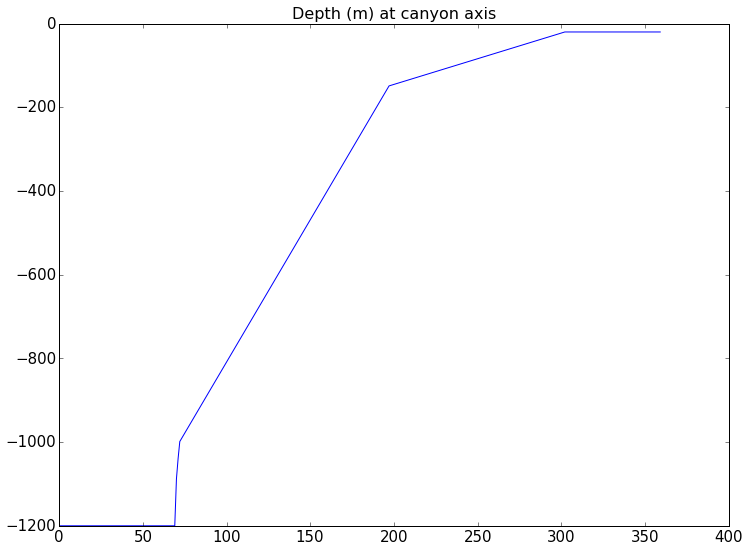

In [12]:

plt.rcParams.update({'font.size': 15})

fig = plt.figure(figsize=(12,9))

CS = plt.plot(bathy[180,:] )

plt.title('Depth (m) at canyon axis',fontsize=16)



<function matplotlib.pyplot.show>

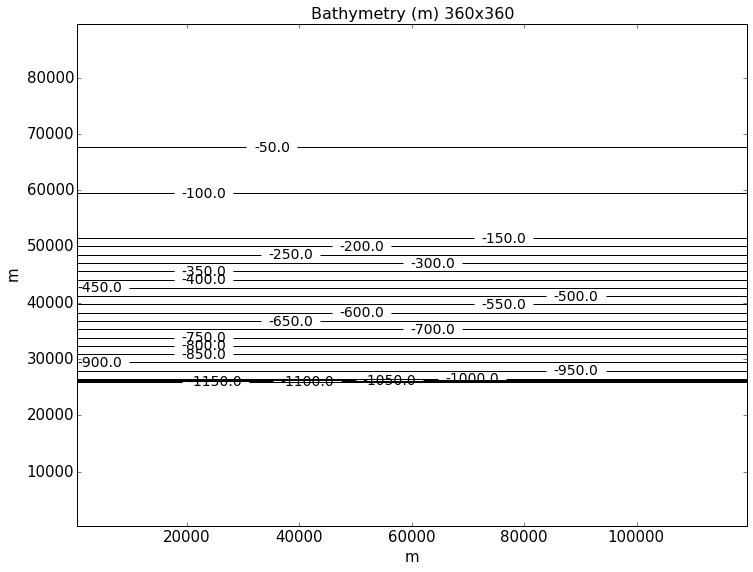

In [13]:


plt.rcParams['contour.negative_linestyle'] = 'solid'

fig = plt.figure(figsize=(12,9))

CS = plt.contour(x,y,np.transpose(bathy),25,colors='k' )

plt.clabel(CS, 
           inline=1,
           fmt='%1.1f',
           fontsize=14)

plt.xlabel('m')
plt.ylabel('m')
plt.title('Bathymetry (m) 360x360',fontsize=16)



plt.show


<matplotlib.colorbar.Colorbar instance at 0x7f1b7b2c1710>

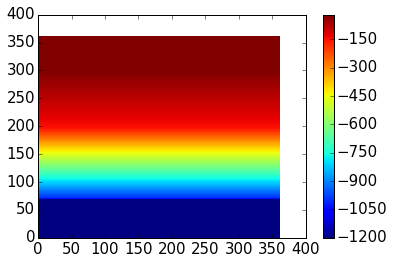

In [14]:
# saving binary files

dt = np.dtype('>f8')  # float 64 big endian

tmpfile = "dely_%dx%d_NonUni_NoCanyonLinear.bin" %(x_size,y_size)
fileobj = open(tmpfile,mode='wb')
dely.astype(dt).tofile(fileobj,"")
fileobj.close()

tmpfile = "delx_%dx%d_NonUni_NoCanyonLinear.bin" %(x_size,y_size)
fileobj = open(tmpfile, mode='wb')
delx.astype(dt).tofile(fileobj,"")
fileobj.close()

tmpfile = "bathy_smooth_%dx%d_NonUni_NoCanyonLinear.bin"%(x_size,y_size)
fileobj = open(tmpfile, mode='wb')
dd=np.transpose(bathy)
#dd=np.asfortranarray(bathy, dtype=dt)
dd.astype(dt).tofile(fileobj,"")
fileobj.close()

plt.pcolor(dd)
plt.colorbar()


In [15]:
#Check that it works when read by Fortran

filename = 'bathy_smooth_%dx%d_NonUni_NoCanyonLinear.bin'%(x_size,y_size)
cc=np.fromfile(filename, dtype=dt)
np.shape(cc)



(129600,)

<matplotlib.colorbar.Colorbar instance at 0x7f1b7315fea8>

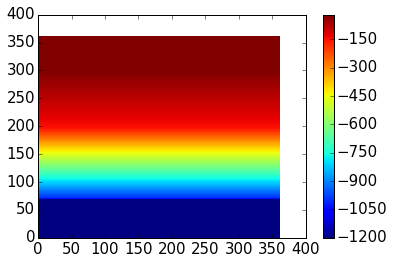

In [16]:

bF=np.reshape(cc,[x_size,y_size]) # F to read in Fortran order
plt.pcolor(bF)
plt.colorbar()

In [17]:
# Check how Jessica's bathy looks like
filename = '/ocean/jspurgin/MITgcm/Building_canyon/Topography/Smooth/360x360/topog_smooth_360x360.box'
cc=np.fromfile(filename, dtype=dt)
np.shape(cc)

bF=np.reshape(cc,[x_size,y_size]) # F to read in Fortran order
plt.pcolor(bF)
plt.colorbar()

IOError: [Errno 2] No such file or directory: '/ocean/jspurgin/MITgcm/Building_canyon/Topography/Smooth/360x360/topog_smooth_360x360.box'

 Parameter definitions:
 --------------------
 
  y_wall = the length of the ocean basin (y-axis)(going from 0=deep ocean m high values = coast
  x_wall = the width of the ocean basin (x-axis)
  y_base = the distance where the slope begins to rise from the bottom
   y_bc = the distance to the canyon mouth
   y_sb = the distance of the shelf break
   y_100 = the distance to the 100m isobath
   y_50 = the distance to the 50m isobath
 y_coast = the distance to the "coast" where topography stops increasing, but depth NOT =0
z_bottom = depth of the "deep ocean"; z is measured from the bottom up
  z_bc = depth of the 1000 m contour
  z_800 = depth of the 800 m contour
  z_600 = depth of the 600 m contour
  z_400 = depth of the 400 m contour
  z_200 = depth of the 200 m contour
   z_sb = shelf break depth (150m)
  z_100 = depth of the 100 m contour
   z50 = depth of the 50 m contour
  z_wall = the depth of the topography beyond the y_coast variable (i.e. z_wall NOT = total fluid depth)
  cR = the radius of curvature at the shelf break depth
   W = the width at half the length at the shelf break depth
   Wsb = the width at the shelf break
   L = the length of the canyon
   p,q = geometric parameters used to help shape the canyon see geometry.ods

